In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'

In [3]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


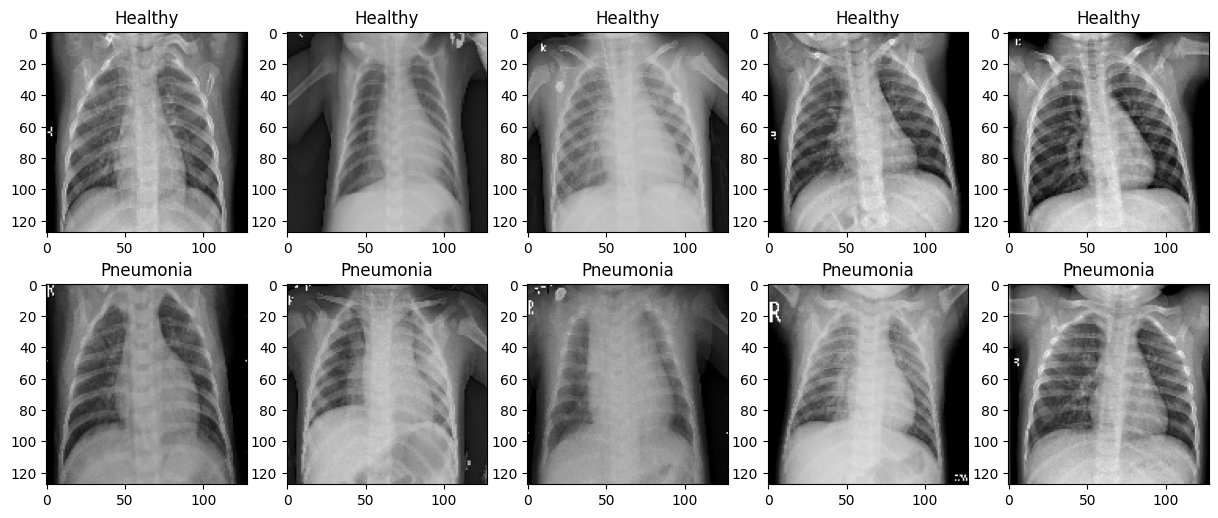

In [4]:
import matplotlib.pyplot as plt

# Extract some images from the data generator
num_images_to_display = 5  # Number of images you want to display

# Extract images from the data generator for category 0 (e.g., healthy)
healthy_images, _ = train_generator.next()
# Extract images from the data generator for category 1 (e.g., pneumonia)
pneumonia_images, _ = train_generator.next()

# Display the images
plt.figure(figsize=(15, 6))
for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(healthy_images[i])
    plt.title("Healthy")

    plt.subplot(2, num_images_to_display, num_images_to_display + i + 1)
    plt.imshow(pneumonia_images[i])
    plt.title("Pneumonia")

plt.show()

In [14]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
163/163 [==============================] - 45s 266ms/step - loss: 0.2647 - accuracy: 0.9005 - val_loss: 0.2106 - val_accuracy: 0.9375
Epoch 2/10
163/163 [==============================] - 43s 265ms/step - loss: 0.1200 - accuracy: 0.9551 - val_loss: 0.1974 - val_accuracy: 0.9375
Epoch 3/10
163/163 [==============================] - 44s 269ms/step - loss: 0.0739 - accuracy: 0.9732 - val_loss: 0.4410 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 43s 265ms/step - loss: 0.0549 - accuracy: 0.9785 - val_loss: 0.0857 - val_accuracy: 1.0000
Epoch 5/10
163/163 [==============================] - 43s 264ms/step - loss: 0.0546 - accuracy: 0.9804 - val_loss: 0.2710 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 44s 268ms/step - loss: 0.0315 - accuracy: 0.9875 - val_loss: 0.1522 - val_accuracy: 0.9375
Epoch 7/10
163/163 [==============================] - 44s 267ms/step - loss: 0.0186 - accuracy: 0.9927 - val_loss: 0.2993 - val_ac

In [17]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Accuracy on the test set: {test_accuracy * 100:.2f}%')

20/20 [==============================] - 5s 231ms/step - loss: 1.6553 - accuracy: 0.7660
Accuracy on the test set: 76.60%


In [18]:
import tensorflow as tf
from keras.models import load_model

model.save('pneumonia_model.h5')

In [19]:
# Load the saved model
loaded_model = tf.keras.models.load_model('pneumonia_model.h5')

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image for prediction (replace 'path_to_image.jpg' with the actual image file path)
img_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg'
img = image.load_img(img_path, target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.0  # Rescale the image just like during training

# Make predictions using the loaded model
predictions = loaded_model.predict(img)
print(predictions)

# Assuming that predictions[0] will be the probability of having pneumonia
# You can set a threshold to determine if the person has pneumonia or not
threshold = 0.5  # You can adjust the threshold as needed

if predictions[0] > threshold:
    print("The person has pneumonia.")
else:
    print("The person is healthy.")

1/1 [==============================] - 0s 18ms/step
[[1.2701402e-07]]
The person is healthy.


In [38]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image for prediction (replace 'path_to_image.jpg' with the actual image file path)
img_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg'
img = image.load_img(img_path, target_size=(128, 128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.0  # Rescale the image just like during training

# Make predictions using the loaded model
predictions = loaded_model.predict(img)
print(predictions)

# Assuming that predictions[0] will be the probability of having pneumonia
# You can set a threshold to determine if the person has pneumonia or not
threshold = 0.5  # You can adjust the threshold as needed

if predictions[0] > threshold:
    print("The person has pneumonia.")
else:
    print("The person is healthy.")

1/1 [==============================] - 0s 18ms/step
[[0.99991214]]
The person has pneumonia.
